In [168]:
data = ((2,2),(3,4),(6,4),(7,9),(8,10),(10,6),(14,10),(15,13),(16,18),(17,14),(18,16))

In [169]:
x = []
y = []
for x_,y_ in data:
    print(x_,y_)
    x.append(x_)
    y.append(y_)
original_x = x

2 2
3 4
6 4
7 9
8 10
10 6
14 10
15 13
16 18
17 14
18 16


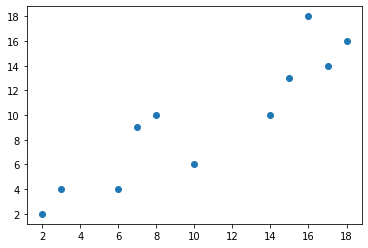

In [76]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')

# 1차 방정식 풀이
## Example 1
### 코딩 풀이
$$ y = w_0 + w_1x$$
find w_0, w_1

In [26]:
import pandas as pd
import numpy as np

import torch
from torch import nn

#음? 파이토치로 하면 random 껴서 정확하게 안 나옴
from sklearn.linear_model import LinearRegression

In [44]:
x = np.array(x).reshape(-1,1)

In [33]:
reg = LinearRegression().fit(x, y)

In [34]:
reg.coef_

array([0.8340708])

In [35]:
reg.intercept_

0.8407079646017674

In [37]:
print("w_0:",reg.intercept_)
print("w_1:",reg.coef_)

w_0: 0.8407079646017674
w_1: [0.8340708]


### 행렬 풀이

$$A = X^{T}X$$
$$b = X^{T}Y$$
$$w = (A)^{-1}(b)$$

In [58]:
x = [[1,_] for _ in original_x]

In [59]:
x

[[1, 2],
 [1, 3],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 10],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18]]

In [55]:
y

[2, 4, 4, 9, 10, 6, 10, 13, 18, 14, 16]

In [62]:
x = np.array(x)
A = np.dot(x.T,x)
A

array([[  11,  116],
       [ 116, 1552]])

In [65]:
b = np.dot(x.T,y)
b

array([ 106, 1392])

In [67]:
inv_A = np.linalg.inv(A)
w = np.dot(inv_A,b)
w#intercept, coefficient

array([0.84070796, 0.8340708 ])

# Additive Linear Model

## Example 2
Find the 3rd order Polynomial which best fits the data

$$ f(x) = w_0 + w_1h_1(x) + w_2h_2(x) + w_3h_3(x)$$ 
<tab>where</tab>, $h_1(x) = x, h_2(x) = x^2, h_3(x) = x^3$

$$w = (H^TH)^{-1}(H^TY)$$

In [99]:
x

[2, 3, 6, 7, 8, 10, 14, 15, 16, 17, 18]

In [100]:
y

[2, 4, 4, 9, 10, 6, 10, 13, 18, 14, 16]

In [101]:
def h_0(x):
    return 1

def h_1(x):
    return x

def h_2(x):
    return x**2

def h_3(x):
    return x**3

In [102]:
H = [[h_0(_),h_1(_),h_2(_),h_3(_)] for _ in x]

In [103]:
H

[[1, 2, 4, 8],
 [1, 3, 9, 27],
 [1, 6, 36, 216],
 [1, 7, 49, 343],
 [1, 8, 64, 512],
 [1, 10, 100, 1000],
 [1, 14, 196, 2744],
 [1, 15, 225, 3375],
 [1, 16, 256, 4096],
 [1, 17, 289, 4913],
 [1, 18, 324, 5832]]

$A= (H^TH)^-1$

In [105]:
H = np.array(H)
A = np.dot(H.T,H)
A = np.linalg.inv(A)

$B = (H^TY)$

In [107]:
B = np.dot(H.T, y)
B

array([   106,   1392,  20592, 322332])

$w$

In [108]:
w = np.dot(A,B)

In [109]:
w

array([-0.63135296,  1.71346443, -0.12190118,  0.00448165])

In [110]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
w_3 = w[3]

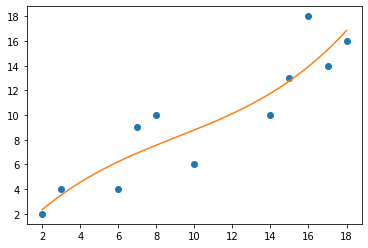

In [120]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
x_axis = np.linspace(2,18,200)
line = [w_0+w_1*x+w_2*x**2+w_3*x**3 for x in x_axis]
plt.plot(x_axis,line)

## Example 3
$$f(x) = w_0 + w_1h_1(x)+ w_2h_2(x)$$
where $h_1(x) = x, h_2(x) = sin(ax)$

In [151]:
x = original_x

In [152]:
import math
def h_0(x):
    return 1
def h_1(x):
    return x
def h_2(x):
    return math.sin(x)

In [153]:
H = [[h_0(_),h_1(_),h_2(_)] for _ in x]

In [154]:
H = np.array(H)
A = np.dot(H.T,H)
A = np.linalg.inv(A)

In [155]:
B = np.dot(H.T, y)
B

array([ 106.        , 1392.        ,    1.50994303])

In [156]:
w = np.dot(A,B)
w

array([0.32877088, 0.87373928, 0.68019117])

In [157]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]

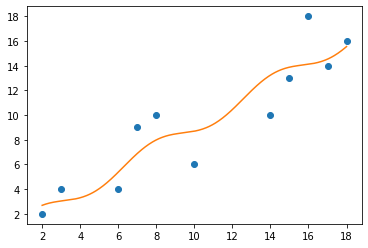

In [158]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
x_axis = np.linspace(2,18,500)
line = [w_0+w_1*h_1(x)+w_2*h_2(x) for x in x_axis]
plt.plot(x_axis,line)

## Example 4: Kernel Regression
$$f(x) = w_0 + w_1h_1(x) + w_2h_2(x) + w_3h_3(x)$$

where, $h_1(x) = exp(\frac{-(x-1)^2}{18}),h_2(x) = exp(\frac{-(x-9)^2}{18}),h_3(x) = exp(\frac{-(x-18)^2}{18})$

In [171]:
x = original_x

In [172]:
import math

def h_0(x):
    return 1

def h_1(x):
    return math.exp(-(x-1)**2/18)

def h_2(x):
    return math.exp(-(x-9)**2/18)

def h_3(x):
    return math.exp(-(x-18)**2/18)

In [173]:
H = [[h_0(_),h_1(_),h_2(_),h_3(_)] for _ in x]

In [174]:
H = np.array(H)
A = np.dot(H.T,H)
A = np.linalg.inv(A)
A

array([[ 6.51664581, -6.69965932, -7.00917844, -7.35037506],
       [-6.69965932,  7.54009654,  7.09201056,  7.56801328],
       [-7.00917844,  7.09201056,  7.90651972,  7.86921576],
       [-7.35037506,  7.56801328,  7.86921576,  8.61977172]])

In [175]:
B = np.dot(H.T, y)
B

array([106.        ,   8.03539143,  31.4545642 ,  55.87497233])

In [176]:
w = np.dot(A,B)
w

array([ 5.75741455, -3.63762643,  2.40251132, 10.82445112])

In [177]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]
w_3 = w[3]

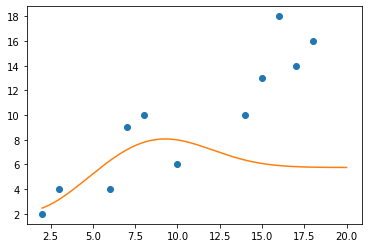

In [181]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
x_axis = np.linspace(2,20,5000)
line = [w_0+w_1*h_1(x)+w_2*h_2(x) for x in x_axis]
plt.plot(x_axis,line)

# Maximum Likelihood Estimation